## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [33]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

### 之前做過的處理

In [18]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [31]:
age_binned

,AGE_BINNED
"(35.0, 40.0]",42868
"(40.0, 45.0]",41406
"(30.0, 35.0]",39440
"(45.0, 50.0]",35135
"(50.0, 55.0]",34942
"(55.0, 60.0]",33120
"(25.0, 30.0]",32862
"(60.0, 65.0]",27476
"(20.0, 25.0]",12159
"(65.0, 70.0]",8103


Text(0.5,1,'AGE')

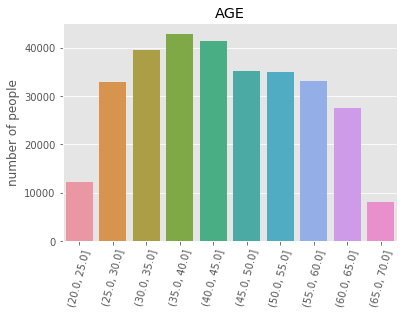

In [44]:
app_train['AGE'] = app_train['DAYS_BIRTH'] / 365
app_train['AGE_BINNED'] = pd.cut(app_train['AGE'], np.linspace(20, 70, 11))
age_binned = pd.DataFrame(app_train['AGE_BINNED'].value_counts())

plt.style.use('ggplot')

sns.barplot(age_binned.index, age_binned['AGE_BINNED'])
plt.xticks(rotation=75); plt.ylabel('number of people'); plt.title('AGE')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

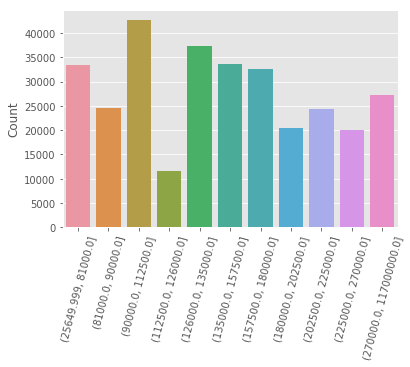

In [64]:
app_train['INCOME_BINNED'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 11)
income_binned = pd.DataFrame(app_train['INCOME_BINNED'].value_counts())
income_binned.rename(columns={'INCOME_BINNED': 'Count'}, inplace=True)

sns.barplot(income_binned.index, income_binned['Count'])
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

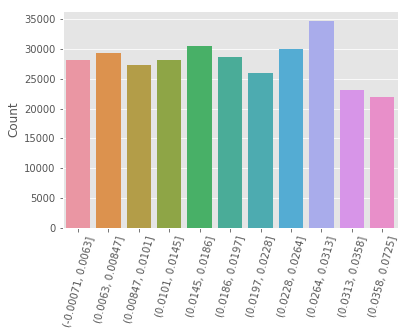

In [69]:
app_train['POP_BINNED'] = pd.qcut(app_train['REGION_POPULATION_RELATIVE'], 11)
pop_binned = pd.DataFrame(app_train['POP_BINNED'].value_counts())
pop_binned.rename(columns={'POP_BINNED': 'Count'}, inplace=True)

sns.barplot(pop_binned.index, pop_binned['Count'])
plt.xticks(rotation=75)